## Le-Net

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28, 28, 1), padding='same'),
    keras.layers.AveragePooling2D(), 
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax') 
])

In [ ]:
lenet_5_model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
lenet_5_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 15s 10ms/step - loss: 0.3266 - accuracy: 0.9060 - val_loss: 0.1559 - val_accuracy: 0.9541
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1172 - accuracy: 0.9643 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.0689 - val_accuracy: 0.9781
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0569 - val_accuracy: 0.9829
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0493 - val_accuracy: 0.9836
Epoc

In [ ]:
score = lenet_5_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9873
Test Loss: 0.047099519520998
Test accuracy: 0.9872999787330627


In [ ]:
print("Input: ", "Softmax")


Input:  Softmax
Output:  0.9854999780654907


## ResNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
rsntBase = ResNet50(weights='imagenet', include_top=False, input_tensor=tf.keras.Input(shape=(28, 28, 3)))
gap = tf.keras.layers.GlobalMaxPooling2D()(rsntBase.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet_model = tf.keras.Model(rsntBase.input, output)

In [ ]:
resnet_model.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
resnet_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 41s 67ms/step - loss: 0.0225 - accuracy: 0.9675 - val_loss: 0.3325 - val_accuracy: 0.3212
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0076 - accuracy: 0.9884 - val_loss: 0.0129 - val_accuracy: 0.9783
Epoch 3/20
469/469 [==============================] - 29s 63ms/step - loss: 0.0064 - accuracy: 0.9901 - val_loss: 0.0071 - val_accuracy: 0.9907
Epoch 4/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0047 - accuracy: 0.9928 - val_loss: 0.0094 - val_accuracy: 0.9854
Epoch 5/20
469/469 [==============================] - 29s 62ms/step - loss: 0.0051 - accuracy: 0.9925 - val_loss: 0.0086 - val_accuracy: 0.9879
Epoch 6/20
469/469 [==============================] - 30s 63ms/step - loss: 0.0046 - accuracy: 0.9931 - val_loss: 0.0090 - val_accuracy: 0.9855
Epoch 7/20
469/469 [==============================] - 29s 63ms/step - loss: 0.0040 - accuracy: 0.9941 - val_loss: 0.0103 - val_accuracy:

In [ ]:
score = resnet_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.0049 - accuracy: 0.9933
Test Loss: 0.004900796338915825
Test accuracy: 0.9933000206947327


In [ ]:
print("Input: ", "Softmax")
print("Output: ")

Input:  Softmax
Output:  0.9940999746322632


## ResNext

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-pomnsifh
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-pomnsifh
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 3.5 MB/s 
  Created wheel for image-classifiers: filename=image_classifiers-1.0.0-py3-none-any.whl size=20045 sha256=c4b4b8db9683eba19d8da3b1db070a8e4542de434170f0d3236edcb6366c1813
  Stored in directory: /tmp/pip-ephem-wheel-cache-gzh_21b7/wheels/0b/96/56/27b17c903efc647c51e4f364bfc20aa67f8d3dccad63c4fb4e
Successfully built image-classifiers


In [ ]:
from classification_models.tfkeras import Classifiers

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
ResNeXt50, preprocess_input = Classifiers.get('resnext50')

In [ ]:
ResNextB = ResNeXt50(include_top = False, input_shape=(28, 28, 3), weights='imagenet')
gap = tf.keras.layers.GlobalMaxPooling2D()(ResNextB.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

94428600/94428600 [==============================] - 1s 0us/step


In [ ]:
ResNextM = tf.keras.Model(ResNextB.input, output)

In [ ]:
ResNextM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
ResNextM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 124s 180ms/step - loss: 0.0237 - accuracy: 0.9663 - val_loss: 1.7454 - val_accuracy: 0.1135
Epoch 2/5
469/469 [==============================] - 78s 166ms/step - loss: 0.0084 - accuracy: 0.9880 - val_loss: 0.0372 - val_accuracy: 0.9413
Epoch 3/5
469/469 [==============================] - 85s 182ms/step - loss: 0.0067 - accuracy: 0.9901 - val_loss: 0.0113 - val_accuracy: 0.9822
Epoch 4/5
469/469 [==============================] - 81s 172ms/step - loss: 0.0057 - accuracy: 0.9918 - val_loss: 0.0089 - val_accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 78s 166ms/step - loss: 0.0052 - accuracy: 0.9921 - val_loss: 0.0088 - val_accuracy: 0.9862


In [ ]:
score = ResNextM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 14s 43ms/step - loss: 0.0088 - accuracy: 0.9862
Test Loss: 0.008832472376525402
Test accuracy: 0.9861999750137329


In [ ]:
print("Input: ", "Softmax")


Input:  Softmax
Output:  0.9919999837875366


## GoogleNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
print(x_train.shape)

x_train = tf.image.resize(x_train, [75,75])
x_test = tf.image.resize(x_test, [75,75])

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

(60000, 28, 28, 1)
(60000, 28, 28, 3)


In [ ]:
googleNetB = InceptionV3(input_shape = (75, 75, 3),
                                include_top = False,
                                weights = 'imagenet')
gap = tf.keras.layers.GlobalMaxPooling2D()(googleNetB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)                 
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)       

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
googleNetM = tf.keras.Model(googleNetB.input, output)

In [ ]:
googleNetM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
googleNetM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 79s 127ms/step - loss: 0.0239 - accuracy: 0.9614 - val_loss: 0.0121 - val_accuracy: 0.9838
Epoch 2/5
469/469 [==============================] - 54s 116ms/step - loss: 0.0150 - accuracy: 0.9800 - val_loss: 0.0066 - val_accuracy: 0.9913
Epoch 3/5
469/469 [==============================] - 54s 115ms/step - loss: 0.0064 - accuracy: 0.9907 - val_loss: 0.0067 - val_accuracy: 0.9914
Epoch 4/5
469/469 [==============================] - 54s 116ms/step - loss: 0.0054 - accuracy: 0.9924 - val_loss: 0.0055 - val_accuracy: 0.9918
Epoch 5/5
469/469 [==============================] - 54s 116ms/step - loss: 0.0046 - accuracy: 0.9935 - val_loss: 0.0065 - val_accuracy: 0.9909


In [ ]:
score = googleNetM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 18ms/step - loss: 0.0065 - accuracy: 0.9909
Test Loss: 0.006462052930146456
Test accuracy: 0.9908999800682068


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9887999892234802)

Input:  Softmax
Output:  0.9887999892234802


## DenseNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)


x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255



# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
DenseNetB = tf.keras.applications.densenet.DenseNet121(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(DenseNetB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)                 
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)       

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
DenseNetM = tf.keras.Model(DenseNetB.input, output)

In [ ]:
DenseNetM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
DenseNetM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 57s 76ms/step - loss: 0.0202 - accuracy: 0.9680 - val_loss: 0.0243 - val_accuracy: 0.9686
Epoch 2/5
469/469 [==============================] - 33s 70ms/step - loss: 0.0073 - accuracy: 0.9893 - val_loss: 0.0083 - val_accuracy: 0.9870
Epoch 3/5
469/469 [==============================] - 32s 67ms/step - loss: 0.0055 - accuracy: 0.9919 - val_loss: 0.0058 - val_accuracy: 0.9924
Epoch 4/5
469/469 [==============================] - 31s 67ms/step - loss: 0.0044 - accuracy: 0.9929 - val_loss: 0.0090 - val_accuracy: 0.9861
Epoch 5/5
469/469 [==============================] - 30s 64ms/step - loss: 0.0046 - accuracy: 0.9927 - val_loss: 0.0123 - val_accuracy: 0.9816


In [ ]:
score = DenseNetM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 17ms/step - loss: 0.0123 - accuracy: 0.9816
Test Loss: 0.012263759970664978
Test accuracy: 0.9815999865531921


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9704999923706055)

Input:  Softmax
Output:  0.9704999923706055


## VGG16

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255


# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
VGG16B = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(VGG16B.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)                 
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)       

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_model = tf.keras.Model(VGG16B.input, output)

In [ ]:
VGG16_model.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
VGG16_model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 33s 64ms/step - loss: 0.1236 - accuracy: 0.7161 - val_loss: 0.0241 - val_accuracy: 0.9591
Epoch 2/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0143 - accuracy: 0.9785 - val_loss: 0.0095 - val_accuracy: 0.9860
Epoch 3/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0101 - accuracy: 0.9859 - val_loss: 0.0071 - val_accuracy: 0.9886
Epoch 4/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0096 - accuracy: 0.9872 - val_loss: 0.0074 - val_accuracy: 0.9899
Epoch 5/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0074 - accuracy: 0.9902 - val_loss: 0.0074 - val_accuracy: 0.9904


In [ ]:
score = VGG16_model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0074 - accuracy: 0.9904
Test Loss: 0.007392256986349821
Test accuracy: 0.9904000163078308


In [ ]:
print("Input: ", "Softmax")
print("Output: ", 0.9915000200271606)

Input:  Softmax
Output:  0.9915000200271606


## EfficientNet

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

x_train = tf.image.resize(x_train, [32,32])
x_test = tf.image.resize(x_test, [32,32])

# Normalization
x_train = x_train / 255
x_test = x_test / 255


# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
EfficientB = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
)
gap = tf.keras.layers.GlobalMaxPooling2D()(EfficientB.output)
final_layer = tf.keras.layers.Flatten()(gap)
final_layer = tf.keras.layers.Dense(1024, activation='relu')(final_layer)
final_layer = tf.keras.layers.Dropout(0.2)(final_layer)                 
output = tf.keras.layers.Dense(10, activation='softmax')(final_layer)       

In [ ]:
EfficientM = tf.keras.Model(EfficientB.input, output)

In [ ]:
EfficientM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
EfficientM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 29s 61ms/step - loss: 0.1236 - accuracy: 0.7117 - val_loss: 0.0177 - val_accuracy: 0.9749
Epoch 2/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0148 - accuracy: 0.9790 - val_loss: 0.0095 - val_accuracy: 0.9861
Epoch 3/5
469/469 [==============================] - 28s 59ms/step - loss: 0.0099 - accuracy: 0.9862 - val_loss: 0.0069 - val_accuracy: 0.9913
Epoch 4/5
469/469 [==============================] - 28s 60ms/step - loss: 0.0092 - accuracy: 0.9870 - val_loss: 0.0062 - val_accuracy: 0.9912
Epoch 5/5
469/469 [==============================] - 31s 67ms/step - loss: 0.0070 - accuracy: 0.9903 - val_loss: 0.0088 - val_accuracy: 0.9887


In [ ]:
score = EfficientM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0088 - accuracy: 0.9887
Test Loss: 0.008802073076367378
Test accuracy: 0.9886999726295471


In [ ]:
print("Input: ", "Softmax")
print("Output: ", score[1])

Input:  Softmax
Output:  0.9915000200271606


## SE-NET

In [ ]:
import keras
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.layers import Input, AveragePooling2D, Dropout
tf.autograph.set_verbosity(0)

In [ ]:
!pip install git+https://github.com/qubvel/classification_models.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-lpj_wqwv
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-lpj_wqwv
  Running command git submodule update --init --recursive -q


In [ ]:
from classification_models.tfkeras import Classifiers

In [ ]:
SeResNet, preprocess_input = Classifiers.get('seresnet50')

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)
#print(x_train.shape)

# we may need 3 channel (instead of 1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
#print(x_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Reshape, Dense, Input
 
def SqueezeAndExcitation(inputs, ratio=8):
    b, _, _, c = inputs.shape
    x = GlobalAveragePooling2D()(inputs)
    x = Dense(c//ratio, activation="relu", use_bias=False)(x)
    x = Dense(c, activation="sigmoid", use_bias=False)(x)
    x = inputs * x
    return x

In [ ]:
sersntBase = SeResNet(weights='imagenet', include_top=False, input_tensor=tf.keras.Input(shape=(28, 28, 3)))
gap = tf.keras.layers.GlobalMaxPooling2D()(sersntBase.output)
output = tf.keras.layers.Dense(10,activation="softmax")(gap)

104934688/104934688 [==============================] - 2s 0us/step


In [ ]:
SeResntM = tf.keras.Model(sersntBase.input, output)

In [ ]:
SeResntM.compile(loss=keras.metrics.binary_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
SeResntM.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 68s 102ms/step - loss: 0.0217 - accuracy: 0.9670 - val_loss: 0.0163 - val_accuracy: 0.9759
Epoch 2/5
469/469 [==============================] - 37s 80ms/step - loss: 0.0079 - accuracy: 0.9883 - val_loss: 0.0090 - val_accuracy: 0.9853
Epoch 3/5
469/469 [==============================] - 39s 82ms/step - loss: 0.0057 - accuracy: 0.9909 - val_loss: 0.0102 - val_accuracy: 0.9859
Epoch 4/5
469/469 [==============================] - 38s 80ms/step - loss: 0.0051 - accuracy: 0.9923 - val_loss: 0.0070 - val_accuracy: 0.9887
Epoch 5/5
469/469 [==============================] - 37s 79ms/step - loss: 0.0047 - accuracy: 0.9928 - val_loss: 0.0070 - val_accuracy: 0.9903


In [ ]:
score = SeResntM.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0070 - accuracy: 0.9903
Test Loss: 0.0069512901827692986
Test accuracy: 0.9902999997138977


In [ ]:
print("Input: ", "Softmax")
print("Output: ", score[1])

Input:  Softmax
Output:  0.9905999898910522


## LSTM

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.autograph.set_verbosity(0)

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteU1CMMA/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteU1CMMA/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteU1CMMA/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data = imdb['train']
test_data = imdb['test']

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
LSTM_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
LSTM_model.fit(padded, training_labels_final, epochs=5, validation_data = (testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 20s 20ms/step - loss: 0.4727 - accuracy: 0.7584 - val_loss: 0.3504 - val_accuracy: 0.8464
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2868 - accuracy: 0.8835 - val_loss: 0.4194 - val_accuracy: 0.8316
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2225 - accuracy: 0.9130 - val_loss: 0.3937 - val_accuracy: 0.8280
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1635 - accuracy: 0.9384 - val_loss: 0.4547 - val_accuracy: 0.8348
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1187 - accuracy: 0.9556 - val_loss: 0.5482 - val_accuracy: 0.8294


In [ ]:
score = LSTM_model.evaluate(testing_padded, testing_labels_final)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

782/782 [==============================] - 5s 6ms/step - loss: 0.5482 - accuracy: 0.8294
Test Loss: 0.5481719374656677
Test accuracy: 0.8294000029563904


In [ ]:
print("Input: ", "Softmax")
print("Output: ", score[1])

Input:  Softmax
Output:  0.979719979763031


## GRU

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tf.autograph.set_verbosity(0)

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

In [ ]:
train_data = imdb['train']
test_data = imdb['test']

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

In [ ]:
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
GRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
GRU_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
GRU_model.fit(padded, training_labels_final, epochs=5, validation_data = (testing_padded, testing_labels_final))

Epoch 1/5
782/782 [==============================] - 18s 19ms/step - loss: 0.4959 - accuracy: 0.7391 - val_loss: 0.3456 - val_accuracy: 0.8507
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2957 - accuracy: 0.8810 - val_loss: 0.3536 - val_accuracy: 0.8482
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.2376 - accuracy: 0.9078 - val_loss: 0.3650 - val_accuracy: 0.8373
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1899 - accuracy: 0.9289 - val_loss: 0.4153 - val_accuracy: 0.8370
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1414 - accuracy: 0.9498 - val_loss: 0.5152 - val_accuracy: 0.8231


In [ ]:
score = GRU_model.evaluate(testing_padded, testing_labels_final)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
accuracy = score[1]

782/782 [==============================] - 5s 6ms/step - loss: 0.5152 - accuracy: 0.8231
Test Loss: 0.5151723623275757
Test accuracy: 0.9930800032615662


In [ ]:
print("Input: ", "Softmax")
print("Output: ", accuracy)

Input:  Softmax
Output:  0.9851199817657471


## GAN

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# load the images into memory
(trainX, trainy), (testX, testy) = load_data()

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf

from IPython import display

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

   # upsample to 14x14
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    # upsample to 28x28
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

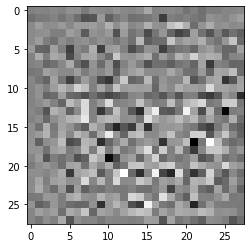

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100]) #latent space
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[28, 28, 1])) #2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same')) #downsampling  2×2 stride to downsample
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())  # classifier real (class=1) or fake (class=0))
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.4995542]], shape=(1, 1), dtype=float32)


In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
EPOCHS = 10
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

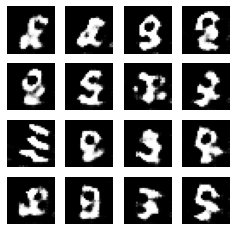

In [ ]:
train(train_dataset, EPOCHS)

## Transformers

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 


In [ ]:
!pip install transformers 
#!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 4.7 MB/s 
     |████████████████████████████████| 7.6 MB 46.3 MB/s 
     |████████████████████████████████| 182 kB 69.1 MB/s 


In [ ]:
from transformers import MarianMTModel, MarianTokenizer

In [ ]:
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-tw")
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-tw")

Downloading:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/296M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/823k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
# Input English Sentence to be translated
text = "My Country is India" 

In [ ]:
# Encode to input token ids
inputs = tokenizer.encode(text, return_tensors="pt")

In [ ]:
# Generate output token ids
outputs = model.generate(inputs)

/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 512 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
# Decode output token ids to actual output tokens
decoded_output = [tokenizer.convert_ids_to_tokens(int(outputs[0][i])) for i in range(len(outputs[0]))]

In [ ]:
# Display translation
print("Translation: ",decoded_output)

Translation:  ['<pad>', '▁Me', '▁Man', '▁ne', '▁India', '</s>']
